In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [17]:
df = pd.read_csv("WELLCOME_APCspend2013_forThinkful.csv", engine='python')

In [3]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
df.dtypes

PMID/PMCID                                             object
Publisher                                              object
Journal title                                          object
Article title                                          object
COST (£) charged to Wellcome (inc VAT when charged)    object
dtype: object

In [18]:
#rename columns for easy reference
df.columns = ['id', 'publisher', 'journal', 'article', 'cost']

In [6]:
df.shape

(2127, 5)

In [38]:
#remove £,$ from cost
df['cost'] = df['cost'].str.replace('£', '')
df['cost'] = df['cost'].str.replace('$', '')

In [39]:
#convert cost to numeric
df['cost'] = pd.to_numeric(df['cost'])

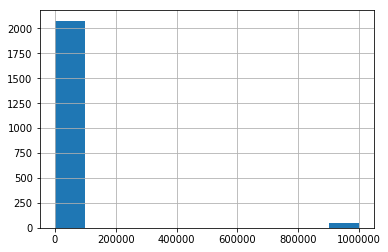

In [40]:
df.cost.hist()

In [41]:
#Replace outlier cost data with None
df.loc[df.cost > 10000, 'cost'] = None

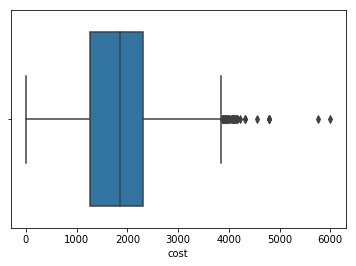

In [42]:
sns.boxplot('cost', data=df)

In [19]:
#make all journal names lowercase
df['journal'] = df['journal'].str.lower()
df['journal'] = df['journal'].str.replace('the', '')
# strip whitespace, remove double spaces
df['journal'] = df['journal'].str.strip().str.replace('  ', ' ')

In [20]:
#replace variations
df['journal'] = df['journal'].str.replace('plosone', 'plos one')
df['journal'] = df['journal'].str.replace('j med chem', 'journal of medicinal chemistry')
df['journal'] = df['journal'].str.replace('antimicrobial agfents and chemorapy', 'antimicrobial agents and chemorapy')
df['journal'] = df['journal'].str.replace('j biol chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('j biol chem.', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('biologicial chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('jnl journal of biological chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('journal journal of biological chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('journal of biol chem', 'journal of biological chemistry')

In [53]:
df['journal'].value_counts()

plos one                                                               200
journal of biological chemistry                                         68
neuroimage                                                              29
nucleic acids research                                                  26
plos pathogens                                                          24
plos genetics                                                           24
proceedings of national academy of sciences                             22
plos neglected tropical diseases                                        20
nature communications                                                   19
human molecular genetics                                                19
movement disorders                                                      15
bmc public health                                                       15
journal of neuroscience                                                 15
biochemical journal      

In [52]:
#top 5 most common journals
df['journal'].value_counts()[:5]

plos one                           200
journal of biological chemistry     68
neuroimage                          29
nucleic acids research              26
plos pathogens                      24
Name: journal, dtype: int64

In [35]:
top_5 = df['journal'].value_counts().index[:5].tolist()

In [51]:
# mean, median, sd for top 5 journals
for j in top_5:
    print(j)
    print('Mean: ', df[df['journal'] == j]['cost'].mean())
    print('Median: ',df[df['journal'] == j]['cost'].median())
    print('Standard Deviation: ',df[df['journal'] == j]['cost'].std())
    print('\n')

plos one
Mean:  931.4815183246061
Median:  893.43
Standard Deviation:  197.5782539794733


journal of biological chemistry
Mean:  1411.143731343284
Median:  1324.57
Standard Deviation:  369.3549551371296


neuroimage
Mean:  2215.168275862069
Median:  2326.43
Standard Deviation:  266.65394691928987


nucleic acids research
Mean:  1149.0
Median:  852.0
Standard Deviation:  442.9404474644419


plos pathogens
Mean:  1572.8668181818182
Median:  1600.25
Standard Deviation:  161.78089066583865


